# California Housing Prices

Small project where I am practicing machine learning skills.

The main goal is to built a model that could predict a median house value. And make the model as accurate as possible.

In [72]:
# Import packages 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [73]:
data = pd.read_csv('housing.csv')

## Get to know data

In [74]:
# Let's take a look
display(data)
display(data.describe())
display(data.info())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

Looks like there're NA values in **total bedrooms** column.

Also ocean_proximity is non-numeric variable, which is problematic for building a model. I need to change that. 

In [75]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Since there 5 types of values. I can turn them into dummies. 

In [76]:
data = data.join(pd.get_dummies(data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  int64  
 10  INLAND              20640 non-null  int64  
 11  ISLAND              20640 non-null  int64  
 12  NEAR BAY            20640 non-null  int64  
 13  NEAR OCEAN          20640 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.2 MB


### Heatmap with correlations

<Axes: >

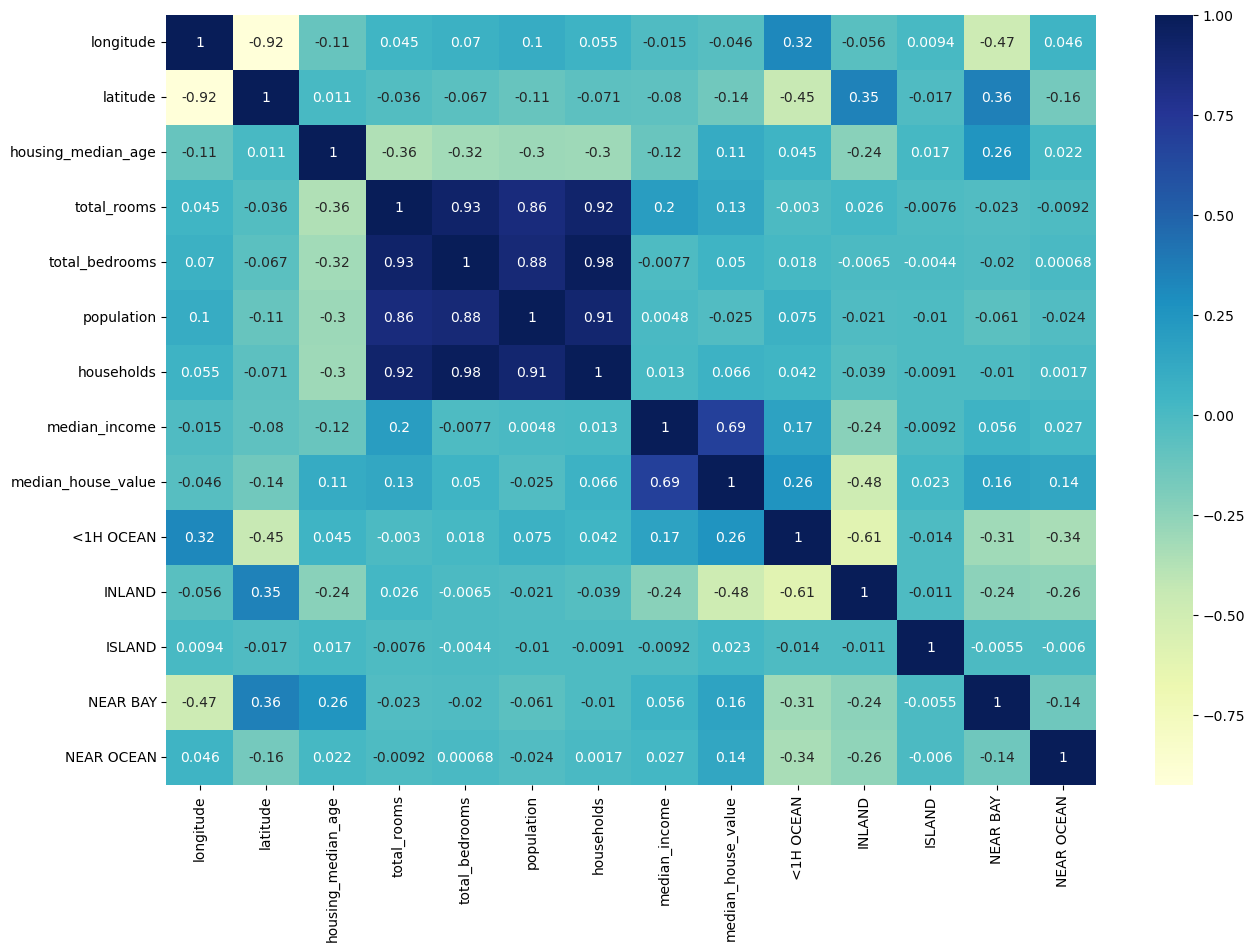

In [78]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

I can see that there's 93% correlation between **total_bedrooms** and **total_rooms**. Since there're NA values in **total_bedrooms** column, I am going to fil them with 7% of a **total_rooms** number. That should give me an approximate value that would be close to a real one. 

In [82]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_rooms']*0.07)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  int64  
 10  INLAND              20640 non-null  int64  
 11  ISLAND              20640 non-null  int64  
 12  NEAR BAY            20640 non-null  int64  
 13  NEAR OCEAN          20640 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.2 MB


No NA values

## Histogram

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

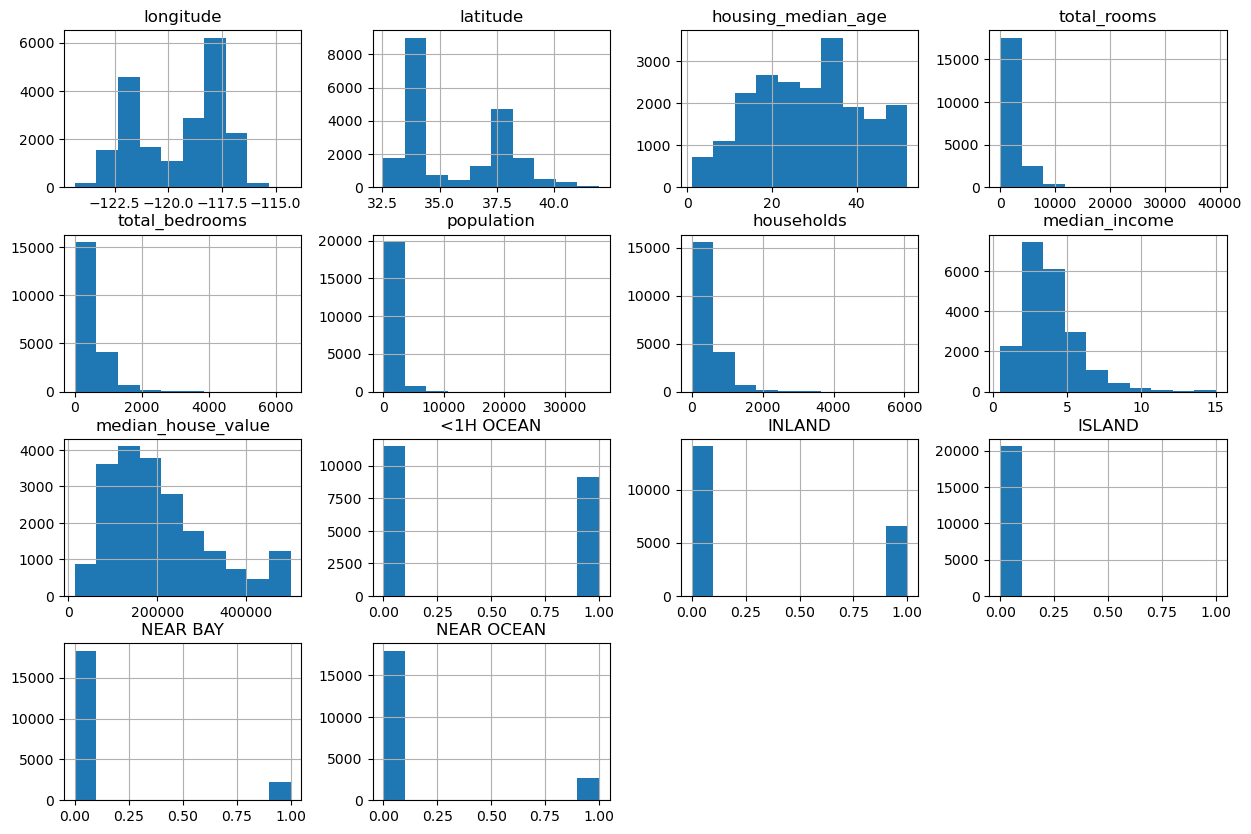

In [84]:
data.hist(figsize=(15,10))

Looks like some data is very skewed. In that case, I am going to do logarithmic transformation in order to condom it to normal distribution pattern.

In [85]:
# Main data
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

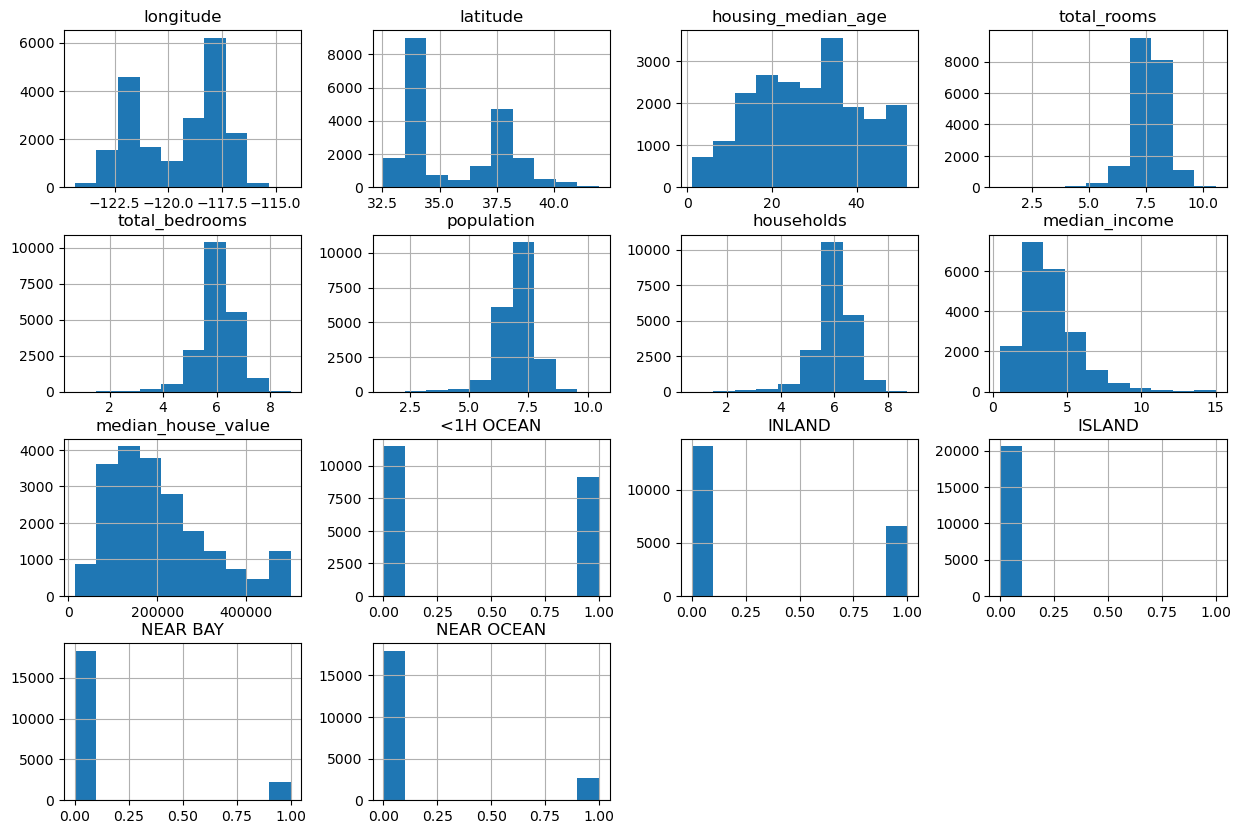

In [86]:
data.hist(figsize=(15,10))

Looks better

## Split the data into training and testing models

In [87]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

display(X)
display(y)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,0,1,0,0,0


0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear regression 

In [92]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [93]:
reg.score(X_test, y_test)

0.667361555814373

Not bad but not good score either. Let's scale the data.

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

reg.fit(X_train_s, y_train)

LinearRegression()

In [103]:
reg.score(X_test_s, y_test)

0.6670010558769466

Not much difference. Therefore I am going to use other models.

## Random forest regressor 

In [101]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [104]:
forest.score(X_test_s, y_test)

0.8146489899284723

Significant improvment. But let's see how further I can go.

In [115]:
# Let's take a look one more time
display(X_train)
display(X_test)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18444,-121.81,37.25,5.0,7.588830,6.255750,6.759255,6.089045,4.4565,1,0,0,0,0
9206,-119.91,37.23,17.0,7.683404,5.966147,6.949856,5.929589,3.6250,0,1,0,0,0
18923,-122.16,38.07,14.0,8.757941,7.120444,7.964503,7.028201,4.5321,0,0,0,1,0
2619,-124.08,40.94,18.0,7.346655,5.846439,6.848005,5.817111,2.3147,0,0,0,0,1
1168,-121.57,39.50,31.0,7.612831,6.152733,6.979145,6.079933,1.5714,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20466,-118.75,34.27,24.0,8.083946,6.135565,7.357556,6.102559,5.5983,1,0,0,0,0
13763,-117.12,34.06,38.0,5.641907,4.025352,5.023881,3.970292,1.3906,0,1,0,0,0
2277,-119.79,36.81,33.0,7.287561,5.568345,6.204558,5.541264,4.2500,0,1,0,0,0
4107,-118.37,34.14,23.0,7.541152,6.240276,6.652863,6.171701,3.5096,1,0,0,0,0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2697,-115.37,32.82,30.0,7.379632,5.777652,7.030857,5.817111,3.5735,0,1,0,0,0
263,-122.20,37.77,43.0,7.796058,6.220590,7.338238,6.184149,2.8980,0,0,0,1,0
11092,-117.87,33.81,15.0,8.033658,6.285998,7.145984,6.276643,3.7604,1,0,0,0,0
5587,-118.31,33.80,30.0,8.038189,6.630683,7.625107,6.558198,3.1250,1,0,0,0,0
4996,-118.30,33.99,47.0,7.702104,6.280396,7.551712,6.318968,1.9853,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,-118.04,34.12,39.0,7.833204,5.942799,7.015712,5.880533,5.2249,0,1,0,0,0
7208,-118.18,34.01,42.0,7.520776,6.210600,7.692570,6.200509,2.3462,1,0,0,0,0
13792,-117.44,34.45,6.0,8.710949,7.037028,8.037543,6.854355,3.5167,0,1,0,0,0
9727,-121.70,36.84,19.0,7.828835,6.144186,7.347300,6.111467,4.9107,1,0,0,0,0


In [121]:
# This time I want to try to get rid of longitude
# and latitude. Let's see if it's going to improve the accuracy. 
X_train = X_train.drop(['longitude']+['latitude'], axis=1)
X_test =  X_test.drop(['longitude']+['latitude'], axis=1)

In [122]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [123]:
forest.score(X_test, y_test)

0.7151320069550524

Apparently it only worsened the model. May be scaling it will bring the difference. 

In [124]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [125]:
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [126]:
forest.score(X_test_s, y_test)

0.7166410139975052

Scaling didn't make much of a difference. 

I suppose 81.4% accuracy is as far as I can go. I suspect it's a major problem with the dataset itself. Scarcity of samples sizes causes the model to overfit.